C:\Users\FATEMEH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

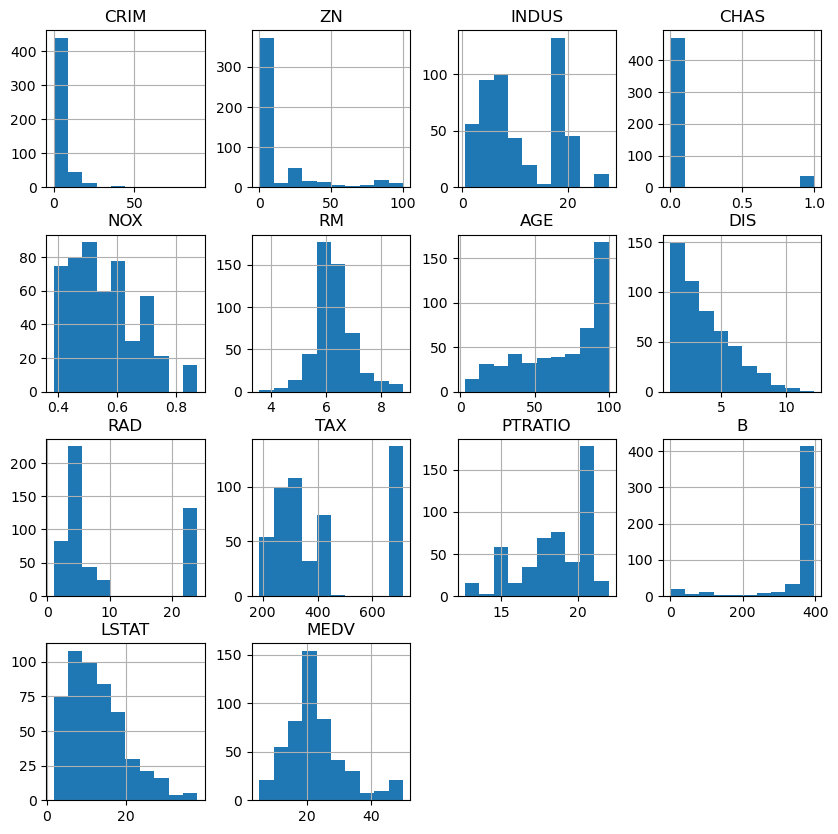

Support Vector Machine:
MSE: 31.58
RMSE: 5.62
MAPE: 15.48%

Random Forest:
MSE: 8.16
RMSE: 2.86
MAPE: 11.10%

Gradient Boosting Machine:
MSE: 6.31
RMSE: 2.51
MAPE: 10.15%


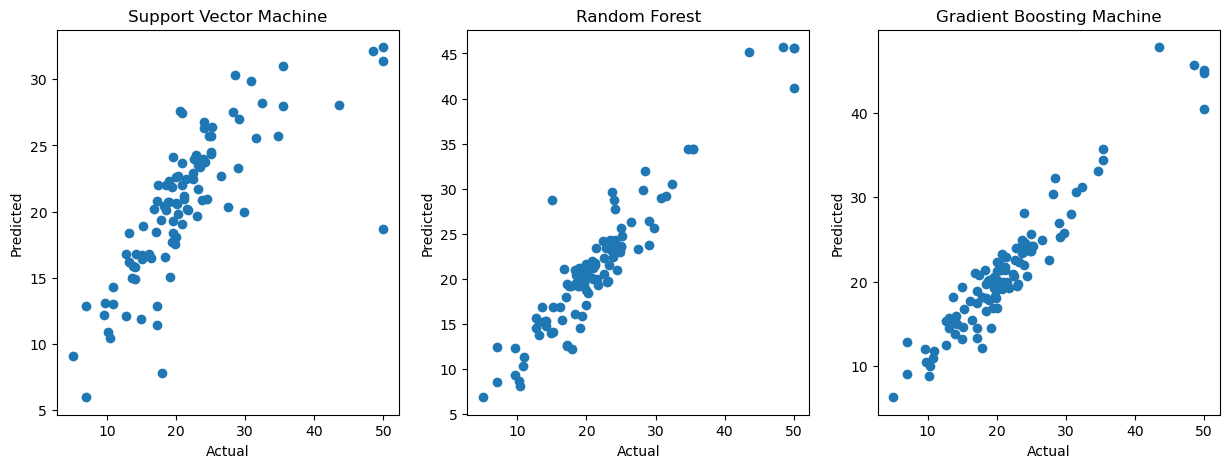

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# load and explore the boston house price dataset
def load_and_explore_data():
   
    boston = load_boston()
    X = boston.data 
    y = boston.target 

    df = pd.DataFrame(X, columns=boston.feature_names)
    df['MEDV'] = y 


    print(df.describe())
    df.hist(bins=10, figsize=(10,10))
    plt.show()

    return X, y

# split the data into train and test sets
def split_data(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# train and evaluate different models on the data
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    
    svr = SVR(kernel='rbf', C=100)
    rf = RandomForestRegressor(n_estimators=100, max_depth=10)
    gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1) 

    # Train the models on the train set
    svr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gbm.fit(X_train, y_train)

    # Predict on the test set
    y_pred_svr = svr.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_gbm = gbm.predict(X_test)

"""    Evaluate the models using mean squared error (MSE),
    root mean squared error (RMSE), and mean absolute percentage error (MAPE)"""
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    mse_gbm = mean_squared_error(y_test, y_pred_gbm)

    rmse_svr = np.sqrt(mse_svr)
    rmse_rf = np.sqrt(mse_rf)
    rmse_gbm = np.sqrt(mse_gbm)

    mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
    mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
    mape_gbm = np.mean(np.abs((y_test - y_pred_gbm) / y_test)) * 100
    
    # Print the results
    print("Support Vector Machine:")
    print("MSE: {:.2f}".format(mse_svr))
    print("RMSE: {:.2f}".format(rmse_svr))
    print("MAPE: {:.2f}%".format(mape_svr))
    print()

    print("Random Forest:")
    print("MSE: {:.2f}".format(mse_rf))
    print("RMSE: {:.2f}".format(rmse_rf))
    print("MAPE: {:.2f}%".format(mape_rf))
    print()

    print("Gradient Boosting Machine:")
    print("MSE: {:.2f}".format(mse_gbm))
    print("RMSE: {:.2f}".format(rmse_gbm))
    print("MAPE: {:.2f}%".format(mape_gbm))
    return y_pred_svr, y_pred_rf, y_pred_gbm

# plot the actual vs predicted values for each model using scatter plots
def plot_results(y_test, y_pred_svr, y_pred_rf, y_pred_gbm):
    
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.scatter(y_test, y_pred_svr)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Support Vector Machine')

    plt.subplot(1,3,2)
    plt.scatter(y_test, y_pred_rf)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Random Forest')

    plt.subplot(1,3,3)
    plt.scatter(y_test, y_pred_gbm)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Gradient Boosting Machine')

    plt.show()

# Calling the functions to run the code
X,y = load_and_explore_data()
X_train,X_test,y_train,y_test = split_data(X,y)


y_pred_svr, y_pred_rf, y_pred_gbm = train_and_evaluate_models(X_train,X_test,y_train,y_test)
plot_results(y_test,y_pred_svr,y_pred_rf,y_pred_gbm)